In [1]:
import torch.nn as nn
import torch

# Prepare Data

In [2]:
w1 = 1
w2 = -1
bias = 3

X = torch.arange(-10.0, 11.0, 0.1)
y = X ** 2 - X + 3

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Implement the PolynomialRegression class

In [4]:
class PolynomialRegression(nn.Module):
    def __init__(self):
        super().__init__()

        self.w1 = nn.Parameter(
            torch.rand(1, 
                       requires_grad=True, 
                       dtype=torch.float
                      )
        )

        self.w2 = nn.Parameter(
            torch.rand(1, 
                       requires_grad=True, 
                       dtype=torch.float
                      )
        )

        self.bias = nn.Parameter(
            torch.rand(1, 
                       requires_grad=True, 
                       dtype=torch.float
                      )
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.w1 * x*x + self.w2 * x + self.bias

# Instanciate a model

In [5]:
model = PolynomialRegression()

# Write the training loop

In [6]:
loss = nn.L1Loss()

optim = torch.optim.SGD(model.parameters(), lr=0.005)

In [7]:
epochs = 50
costs = []

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    
    optim.zero_grad()
    
    cost = loss(y_pred, y_train)
    cost.backward()
    costs.append(cost.item())
    
    optim.step()

In [8]:
print(f"Last loss: {cost}")

Last loss: 2.6196436882019043


In [9]:
print(f"Weight1: {w1}, Weight2: {w2}, Bias: {bias}\n")
print(f"Pred. Weight1: {model.w1.item():.2f}, Pred. Weight2: {model.w2.item():.2f}, Bias: {model.bias.item():.2f}")

Weight1: 1, Weight2: -1, Bias: 3

Pred. Weight1: 1.01, Pred. Weight2: -0.62, Bias: 0.53


# Plotting

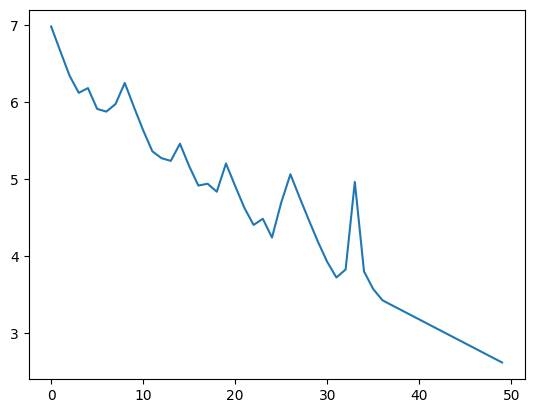

In [10]:
import matplotlib.pyplot as plt

plt.plot([_ for _ in range(len(costs))], costs)

plt.show()

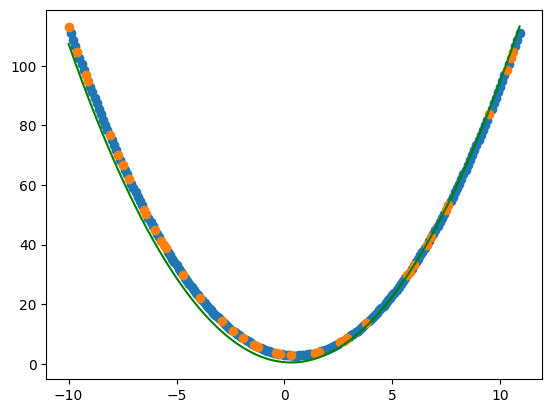

In [11]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.plot(X, model(X).detach().numpy(), c="green" )
plt.show()